# <font size =7 color='black'> Reconstrucción </font> 

## <font size=3 color='black'> El efecto dominante de la evolución no lineal del campo de densidades es suavizar la función de correlación en BAO, que es equivalente a la supresión de las oscilaciones en el espectro de potencias, es decir, se pierde información y precisión en los parámetros cosmológicos que se pueden medir de BAO. Esto llevó a sugerir que el alisamiento de BAO puede invertirse, lo cual es llamado reconstrucción. </font>

# <font color='red'>  Esquema del proceso de reconstrucción </font>


## <font size=5 color='blue'> El código: </font>
<font size=3 color='black'> Este código calcula la función $\psi$  que se restará a las posiciones iniciales para corregirlas, utilizando la aproximación de Zeldovich, $\psi(k)=(-ik/k2)*delta(k)$. Para ello se parte de un archivo de posiciones ($x,y,z$) iniciales, luego calcula la desidad $\rho$, el contraste de densidad ($\delta\rho$), y el filtro gaussiano  $S(k)$. </font>

In [1]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fftn, ifftn

In [2]:
#en coord xyz
x, y, z, vx, vy, vz = np.loadtxt('mock_1_tinker13_standard_z_0.695.txt', usecols=(0, 1, 2, 3, 4, 5), unpack=True)
#x, y, z = np.loadtxt('HOD_GR_B1024_Box1.dat', usecols=(0, 1, 2), unpack=True)


In [3]:
print (len(x))
a=len(x)/100
b=len(x)/200
print (a)
print (b)

816550
8165.5
4082.75


In [4]:
w=np.ones(len(x))

<function matplotlib.pyplot.show>

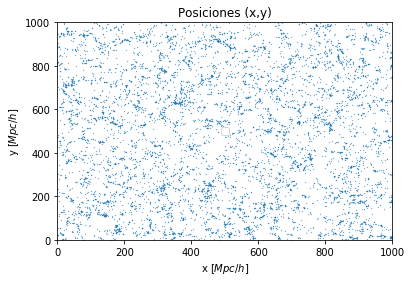

In [5]:
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
tmp=np.where((z>np.min(z))&(z<=np.min(z)+10))
tmp=tmp[0]
plt.plot(x[tmp],y[tmp],'.',ms=0.5)

"""
for i in range(10000):
    plt.plot(x[i],y[i], '.', color='red')
"""
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.title('Posiciones (x,y)')
plt.xlabel('x $[Mpc/h]$')
plt.ylabel('y $[Mpc/h]$')
plt.legend(frameon=False)
#plt.gca().legend('$10000$ puntos','')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_10.pdf")
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_10.png")
plt.show

#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [6]:
nx = len(x)  #num de elementos de x
Ngrid =128#256 #512
boxsize = 1000. #3400
pixsize = boxsize/Ngrid
print (pixsize)

7.8125


In [7]:
delta_pix=pixsize#10  #tamaño del pixel
x_min = np.floor(np.min(x))   
x_max = np.ceil(np.max(x))
#delta_x = (x_max - x_min)/(Ngrid-1)

y_min = np.floor(np.min(y))
y_max = np.ceil(np.max(y))
#delta_y = (y_max - y_min)/(Ngrid-1)

z_min = np.floor(np.min(z))
z_max = np.ceil(np.max(z))
#delta_z = (z_max - z_min)/(Ngrid-1)


#El tamaño de la caja va a cambiar si no se trata de un arreglo de datos "cuadrado" 
#revisar que tenga como valor minimo 0

Ngrid_x=int((x_max-x_min)/(delta_pix)+1)  #quitando +1 queda igual a Ngrid
Ngrid_y=int((y_max-y_min)/(delta_pix)+1)
Ngrid_z=int((z_max-z_min)/(delta_pix)+1)

#rho =np.zeros((Ngrid_x,Ngrid_y,Ngrid_z))
rho =np.zeros((Ngrid,Ngrid,Ngrid))

In [8]:
for ii in range(nx):
    index_x = int(np.floor((x[ii]-x_min)/delta_pix))
    index_y = int(np.floor((y[ii]-y_min)/delta_pix))
    index_z = int(np.floor((z[ii]-z_min)/delta_pix))
    
    
    rho[index_x, index_y, index_z]+=1
    
delta_rho=(rho-np.mean(rho))/(np.mean(rho))  #contraste de densidad 

In [9]:
print (len(delta_rho))

128


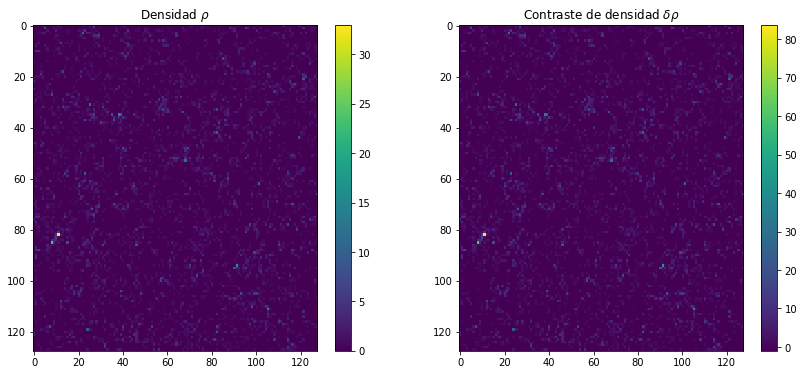

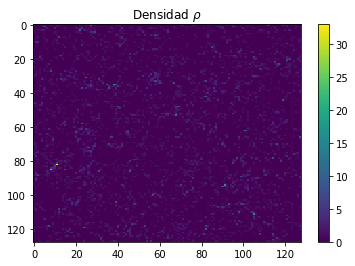

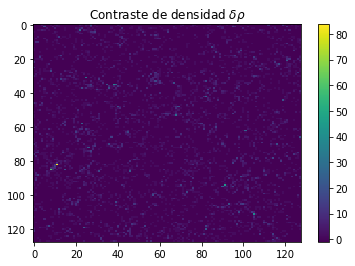

In [16]:
%matplotlib inline
#plots de densidades

#### cambiar pcolormesh por imshow(misma cosa, aspect="auto")

delta_rho1 = delta_rho[:,:,50]
rho1=rho[:,:,50]

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.title("Densidad $\\rho$")
plt.imshow(rho1,aspect="auto")
plt.colorbar()
#plt.xlabel()

plt.subplot(1, 2, 2)
plt.title("Contraste de densidad $\\delta\\rho$")
plt.imshow(delta_rho1,aspect="auto")
plt.colorbar()
#plt.pcolormesh(x, y, rho)
#plt.subplots_adjust(left=0.125,bottom=0.1, right=1.5, top=None,wspace=0.2,hspace=0.7)
plt.savefig("/home/izamar/Downloads/plots_tesis/contraste_y_densidad.pdf")
plt.savefig("/home/izamar/Downloads/plots_tesis/contraste_y_densidad.png")
plt.show()


plt.title("Densidad $\\rho$")
plt.imshow(rho1,aspect="auto")
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/densidad.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/densidad.pdf")
plt.show()
#plt.xlabel()

plt.title("Contraste de densidad $\\delta\\rho$")
plt.imshow(delta_rho1,aspect="auto")
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/contraste_densidad.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/contraste_densidad.pdf")
plt.show()
#plt.pcolormesh(x, y, rho)

In [10]:
#transformada en tres dimensiones 
Tdeltan=np.fft.fftn(delta_rho)
#Tdeltan=np.fft.fftn(delta_rho, norm='ortho') #transformada en 3dim 
iTdeltan=np.fft.ifftn(delta_rho)  #transformada inversa en 3dim
iTdeltan2=np.fft.ifftn(Tdeltan)  #transformada inversa de la transformada del contraste de densidad

#separar la parte real y la compleja de la transformada de fourier del contraste de densidad
real=np.real(Tdeltan)
im=np.imag(Tdeltan)

Tdeltan1=np.fft.fftn(delta_rho)

In [11]:
print (Tdeltan[1,0,0])
print (Tdeltan1[1,0,0])

(14392.706618081022+6965.173508153631j)
(14392.706618081022+6965.173508153631j)


Densidad
Contraste de densidad:
Transformada de Fourier del contraste de densidad:
Transformada inversa del contraste de densidad:
Transformada inversa de la transformada de Fourier del contraste de densidad:
El contraste de densidad y la anterior deben de ser iguales:


/home/izamar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


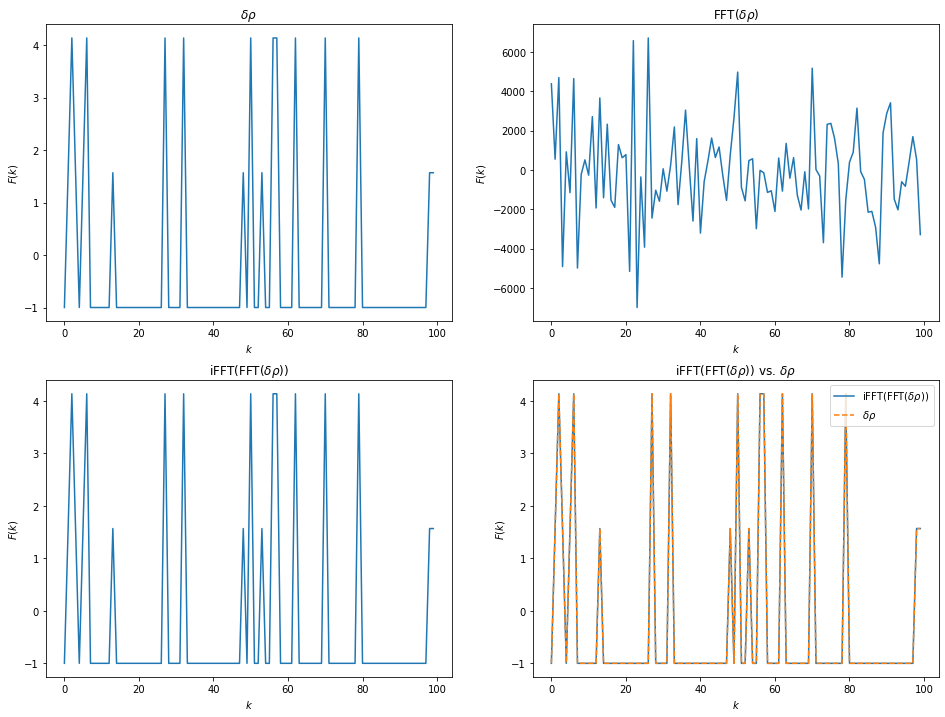

In [17]:
#plots de las transformadas

print ("Densidad"), rho[0,0,0]
print ("Contraste de densidad:"), delta_rho[0,0,0]
print ("Transformada de Fourier del contraste de densidad:"), Tdeltan[0,0,0]
print ("Transformada inversa del contraste de densidad:"), iTdeltan[0,0,0]
print ("Transformada inversa de la transformada de Fourier del contraste de densidad:"), iTdeltan2[0,0,0]
print ("El contraste de densidad y la anterior deben de ser iguales:"), delta_rho[0,0,0], iTdeltan2[0,0,0]

grafTdelta=Tdeltan[ :100,50,50]
grafdelta_rho=delta_rho[ :100,50,50]
grafiTdelta=iTdeltan[ :100,50,50]
grafiTdelta2=iTdeltan2[ :100,50,50]
grafrho=rho[ :100,50,50]

plt.figure(figsize=(16,12))
#plt.subplot(2,3,1)
#plt.title("$\\rho$")
#plt.plot(grafrho)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.title("$\\delta\\rho$")
plt.plot(grafdelta_rho)
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplot(2,2,2)
plt.title("FFT($\\delta\\rho$)")
plt.plot(grafTdelta)
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#plt.subplot(2,3,4)
#plt.title("iFFT($\\delta\\rho$)")
#plt.plot(grafiTdelta)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplot(2,2,3)
plt.title("iFFT(FFT($\\delta\\rho$))")
plt.plot(grafiTdelta2)
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplot(2,2,4)
plt.title("iFFT(FFT($\\delta\\rho$)) vs. $\\delta\\rho$")
#plt.plot(grafrho,label='$\\rho$')
#plt.plot(grafTdelta,label='FFT($\\delta\\rho$)')
plt.plot(grafiTdelta2,label='iFFT(FFT($\\delta\\rho$))')
#plt.plot(grafiTdelta,label='iFFT($\\delta\\rho$)')
plt.plot(grafdelta_rho,"--",label='$\\delta\\rho$')
#plt.subplots_adjust(left=0.125,bottom=0.1, right=1.5, top=None,wspace=0.5,hspace=0.7)
plt.legend(fontsize=10,loc='upper left')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/transf_todas.pdf")
plt.show()

In [10]:
grafTdelta=Tdeltan.flatten()
grafdelta_rho=delta_rho.flatten()
grafiTdelta=iTdeltan.flatten()
grafiTdelta2=iTdeltan2.flatten()
grafrho=rho.flatten()

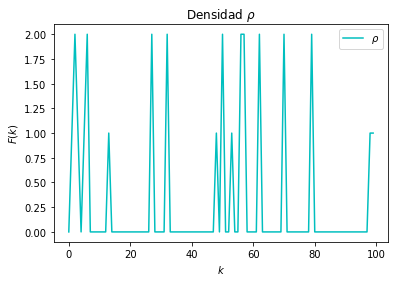

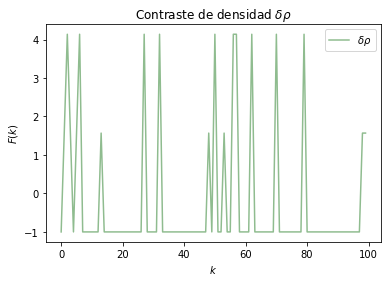

/home/izamar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


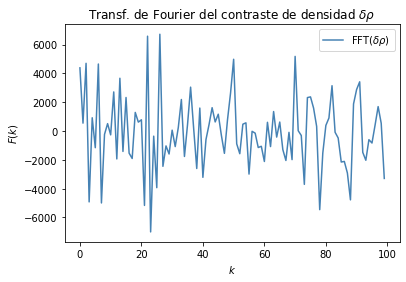

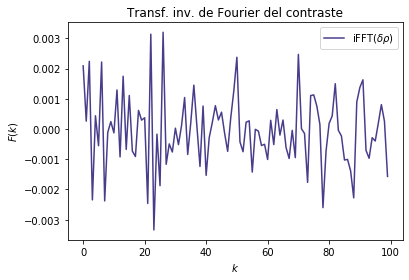

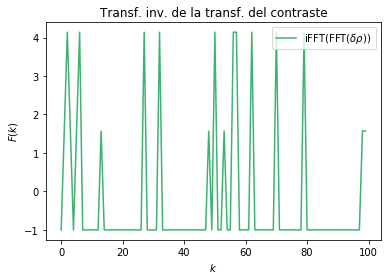

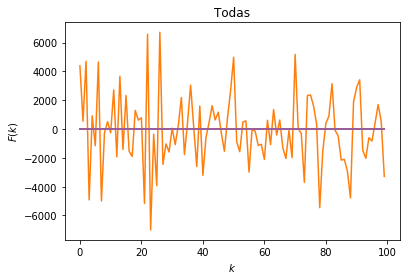

In [18]:

plt.title("Densidad $\\rho$")
plt.plot(grafrho, color='c', label='$\\rho$')
plt.savefig("/home/izamar/Downloads/plots_tesis/densidad_flatten.png")
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.show()

plt.title("Contraste de densidad $\\delta\\rho$")
plt.plot(grafdelta_rho,color='darkseagreen',label='$\\delta\\rho$')
plt.savefig("/home/izamar/Downloads/plots_tesis/deltarho_flatten.png")
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.show()

plt.title("Transf. de Fourier del contraste de densidad $\\delta\\rho$")
plt.plot(grafTdelta,color='steelblue',label='FFT($\\delta\\rho$)')
plt.savefig("/home/izamar/Downloads/plots_tesis/transf_deltarho.png")
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.show()

plt.title("Transf. inv. de Fourier del contraste")
plt.plot(grafiTdelta,color='darkslateblue',label='iFFT($\\delta\\rho$)')
plt.savefig("/home/izamar/Downloads/plots_tesis/transf_inv_deltarho.png")
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.show()

plt.title("Transf. inv. de la transf. del contraste")
plt.plot(grafiTdelta2,color='mediumseagreen',label='iFFT(FFT($\\delta\\rho$))')
plt.savefig("/home/izamar/Downloads/plots_tesis/transf_inv_fft_deltarho.png")
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.show()

plt.title("Todas")
plt.plot(grafrho)
plt.plot(grafTdelta)
plt.plot(grafiTdelta2)
plt.plot(grafiTdelta)
plt.plot(grafdelta_rho)
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.show()


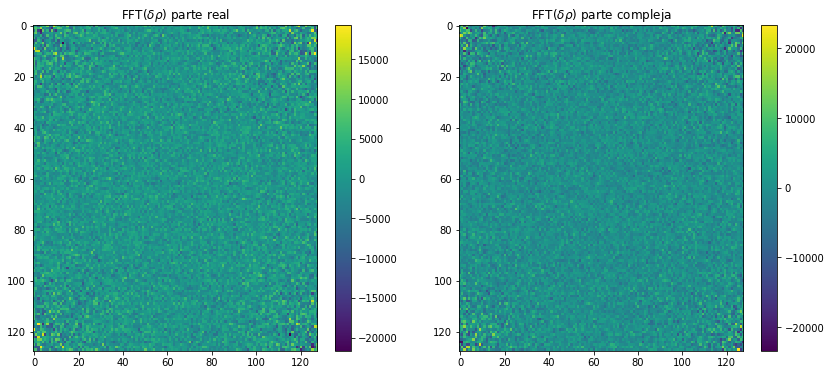

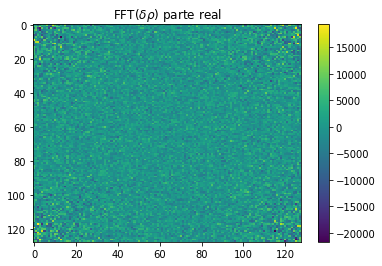

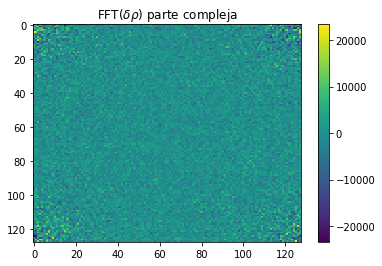

In [17]:
# plots de la parte real y compleja de la transformada

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('FFT($\\delta\\rho$) parte real')
plt.imshow(real[0,:,:],aspect="auto")
plt.colorbar()
plt.subplot(1,2,2)
plt.title('FFT($\\delta\\rho$) parte compleja')
plt.imshow(im[0,:,:],aspect="auto")
plt.colorbar()
#plt.subplot(1,3,3)
#plt.title('Transf. total')
#plt.pcolormesh(Tdeltan[0,:,:])
#plt.subplots_adjust(left=0.125,bottom=0.1, right=1.5, top=None,wspace=0.2,hspace=0.7)
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_real_compleja.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_real_compleja.pdf")
plt.show()


plt.title('FFT($\\delta\\rho$) parte real')
plt.imshow(real[0,:,:],aspect="auto")
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_real.png")
plt.show()

plt.title('FFT($\\delta\\rho$) parte compleja')
plt.imshow(im[0,:,:],aspect="auto")
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_compleja.png")
plt.show()


/home/izamar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/izamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/izamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/izamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/izamar/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


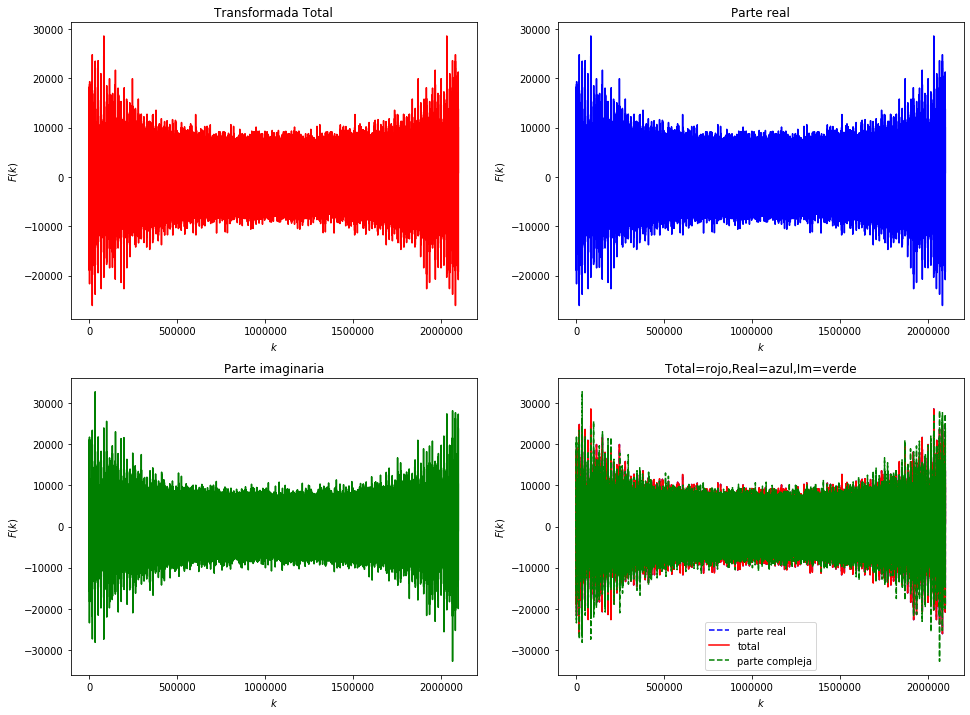

In [20]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,2)
plt.title("Parte real")
plt.plot(real.flatten(), color='b')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
#plt.plot(real[:100,7,7], color='b')
plt.subplot(2,2,1)
plt.title("Transformada Total")
plt.plot(Tdeltan.flatten(), color='r')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.subplot(2,2,3)
plt.title("Parte imaginaria")
plt.plot(im.flatten(), color='g')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.subplot(2,2,4)
plt.title("Total=rojo,Real=azul,Im=verde")
plt.plot(real.flatten(), '--', color='b',label='parte real')
plt.plot(Tdeltan.flatten(), color='r',label='total')
plt.plot(im.flatten(), '--', color='g',label='parte compleja')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
#plt.subplots_adjust(hspace=1.2)
#plt.subplots_adjust(left=0.12,bottom=0.1, right=1.5, top=None,wspace=0.2,hspace=0.7)
plt.legend(fontsize=10,loc='upper left')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_deltarho_flatten2.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_deltarho_flatten2.pdf")
plt.show()


In [22]:
#filtro gaussiano
sigma=15  ##tamaño del smoothing 
dk=(2*np.pi)/(boxsize)
k_min=dk
k_max=(2*np.pi)/(pixsize)
#k_max=(2*np.pi)/(boxsize)

k_arr=np.arange(k_min, k_max+dk, dk)

filtro=np.zeros(real.shape) #arreglo para escribir el filtro S(k)
                             #es del tamaño de la parte real de la transf. de delta_rho
print (len(filtro))

128


In [24]:
#Ngrid=126
k_arr2=np.fft.fftfreq(Ngrid, d=pixsize)*(2*np.pi)
print (Ngrid)
print (len(k_arr2))

128
128


In [26]:
##Se calcula el smoothing 
#filtro gaussiano
#Ngrid=126
print (Ngrid)

for ii in range(Ngrid):  #range(Ngrid_x) #range(nx)
    for jj in range(Ngrid):
        for kk in range(Ngrid):
            k2=(k_arr2[ii])**2 + (k_arr2[jj])**2 + (k_arr2[kk])**2
            filtro[ii,jj,kk]=np.exp(-(sigma**2)*(k2/2))  ##filtro S(k)
            

128


In [20]:
#esto es lo mismo que lo anterior

#kx, ky, kz=np.meshgrid(k_arr2,k_arr2,k_arr2)
#norma=np.power(kx,2) + np.power(ky,2) + np.power(kz,2)
#filtro2=np.exp(-(sigma**2)*(norma/2))

In [21]:
#print np.array_equal(filtro,filtro2)
#print np.allclose(filtro, filtro2)
#print np.shape(filtro)
#print filtro2.shape
#print Tdeltan.shape

False
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


In [27]:
%matplotlib inline
##Aplicar la aproximacón de Zeldovich

#fft_filtro=real*index3D  ##FFT(f*g)=fft(f)*fft(g) con el filtro #real es la parte real de la transf de delta
                         #real=np.real(Tdeltan)   entonces Tdeltan(delta_rho)*S(k)
rfft_filtro=real*filtro #parte real de Tdeltan por el smoothing 
ifft_filtro=im*filtro   #parte compleja de Tdeltan por el smoothing 
fft_filtro=Tdeltan*filtro  #toda Tdeltan por el smoothing

inv_fft_filtro=ifftn(fft_filtro)   #transformada inversa con el filtro #contraste de densidad con filtro


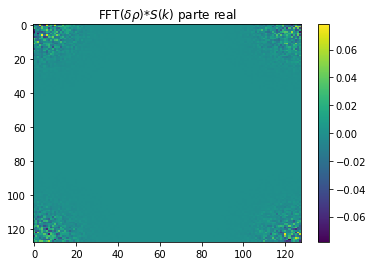

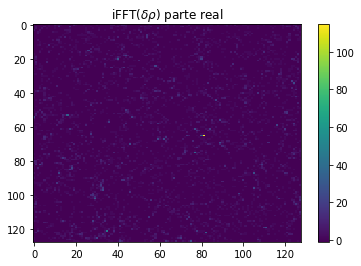

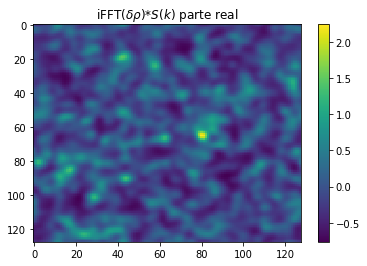

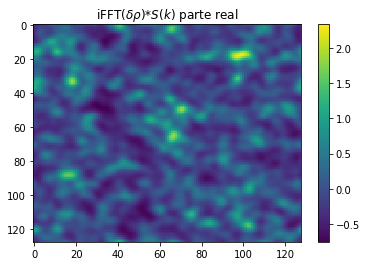

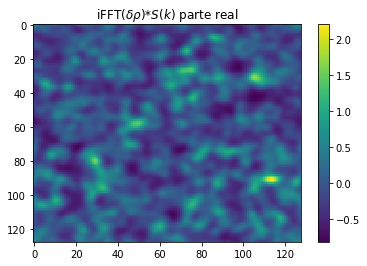

In [37]:
# plots con el filtro
#estos estaban en cero

#### cambiar pcolormesh por imshow(misma cosa, aspect="auto")

#iTdeltan2=np.fft.ifftn(Tdeltan)

plt.imshow(rfft_filtro[50,:,:],aspect="auto")
plt.title('FFT($\\delta\\rho$)$*S(k)$ parte real')#Parte real de Tdelta con el smooting
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_deltarho_smoot.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/fft_deltarho_smoot.pdf")
plt.show()

plt.imshow(np.real(iTdeltan2[50,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$) parte real') #Parte real de la transf. inv. con el filtro
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0.pdf")
plt.show()

plt.imshow(np.real(inv_fft_filtro[50,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$)$*S(k)$ parte real') #Parte real de la transf. inv. con el filtro
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_0.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_0.pdf")
plt.show()

plt.imshow(np.real(inv_fft_filtro[10,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$)$*S(k)$ parte real')#Parte real de la transf. inv. con el filtro
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_10.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_10.pdf")
plt.show()

plt.imshow(np.real(inv_fft_filtro[100,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$)$*S(k)$ parte real')#Parte real de la transf. inv. con el filtro
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_100.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_smoot_100.pdf")
plt.show()

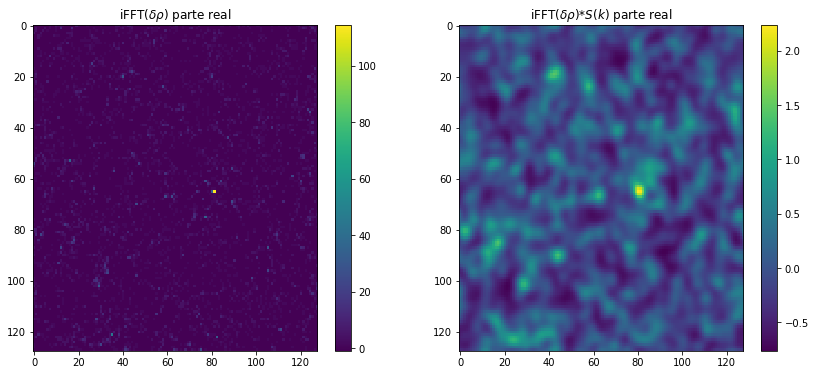

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(np.real(iTdeltan2[50,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$) parte real') #Parte real de la transf. inv. con el filtro
plt.colorbar()
#plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0.png")
#plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0.pdf")
#plt.show()

plt.subplot(1,2,2)
plt.imshow(np.real(inv_fft_filtro[50,:,:]),aspect="auto")  #esto debe de verse como la densidad
plt.title('iFFT($\\delta\\rho$)$*S(k)$ parte real') #Parte real de la transf. inv. con el filtro
plt.colorbar()
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0_+smoot.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/ifft_deltarho_0_+smoot.pdf")
plt.show()


/home/izamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.


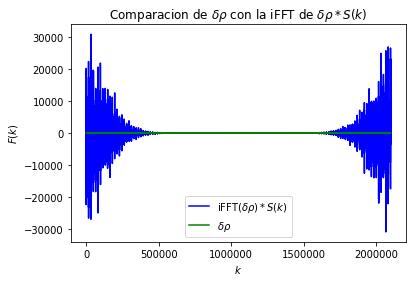

/home/izamar/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/izamar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


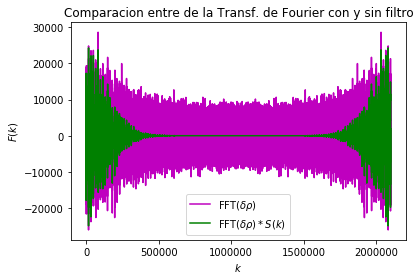

In [28]:
plt.plot(np.real(ifft_filtro).flatten(), color='b', label="iFFT$(\\delta\\rho)*S(k)$")
plt.plot(delta_rho.flatten(), color='g', label="$\\delta\\rho$")
#plt.xlabel('Frecuencias')
#plt.plot(np.real(ifft_filtro[:100,7,7]), color='b')
#plt.plot(delta_rho[:100,7,7], color='g')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.title('Comparacion de $\\delta\\rho$ con la iFFT de $\\delta\\rho*S(k)$')
plt.savefig("/home/izamar/Downloads/plots_tesis/deltarho_ifftdeltarho_smoot.png")
plt.show()

plt.plot(real.flatten(), color='m', label="FFT($\\delta\\rho$)")
plt.plot(fft_filtro.flatten(), color='g', label="FFT$(\\delta\\rho)*S(k)$")
#plt.plot(real[:100,7,7], color='m')
#plt.plot(fft_filtro[:100,7,7], color='g')
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.legend()
plt.title('Comparacion entre de la Transf. de Fourier con y sin filtro')
plt.savefig("/home/izamar/Downloads/plots_tesis/fftdeltarho_fftdeltarho_smoot.png")
plt.show()

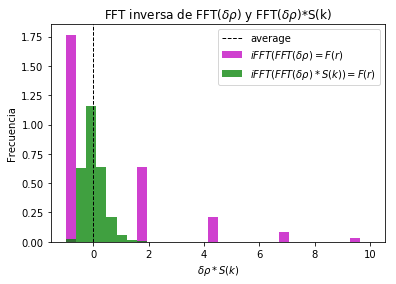

In [16]:
n, bins, patches = plt.hist(np.real(iTdeltan2).flatten(), 30,range=(-1,10) , normed=True, facecolor='m', alpha=0.75, label="$iFFT(FFT(\\delta\\rho)=F(r)$")
n, bins, patches = plt.hist(np.real(inv_fft_filtro).flatten(), 30,range=(-1,10), normed=True, facecolor='g', alpha=0.75, label="$iFFT(FFT(\\delta\\rho)*S(k))=F(r)$")
plt.axvline(np.real(iTdeltan2).flatten().mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.legend()
plt.xlabel('$\\delta\\rho*S(k)$')
plt.ylabel('Frecuencia')
plt.title('FFT inversa de FFT($\\delta\\rho$) y FFT($\\delta\\rho$)*S(k)')
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_ifft_fft+filtro.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_ifft_fft+filtro.pdf")
plt.show()

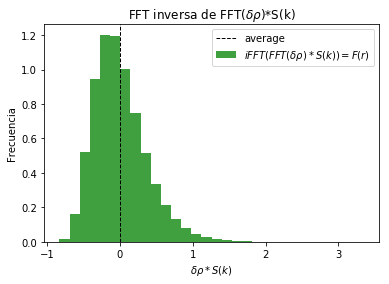

In [32]:
#(fft_filtro)
#inv_fft_filtro=ifftn(fft_filtro)
#np.real(inv_fft_filtro).flatten()
#iTdeltan2=np.fft.ifftn(Tdeltan)
#np.real(iTdelta2).flatten()
#grafiTdelta2=iTdeltan2.flatten()
#real2=np.real(iTdeltan2)
#inversa=ifftn(real)

#n, bins, patches = plt.hist(inversa.flatten(), 100, normed=1, facecolor='b', alpha=0.75, label="$\psi_x$")
n, bins, patches = plt.hist(np.real(inv_fft_filtro).flatten(), 30, normed=1, facecolor='g', alpha=0.75, label="$iFFT(FFT(\\delta\\rho)*S(k))=F(r)$")
plt.axvline(np.real(inv_fft_filtro).flatten().mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.legend()
plt.xlabel('$\\delta\\rho*S(k)$')
plt.ylabel('Frecuencia')
plt.title('FFT inversa de FFT($\\delta\\rho$)*S(k)')
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_ifft_fft-filtro.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_ifft_fft-filtro.pdf")
plt.show()

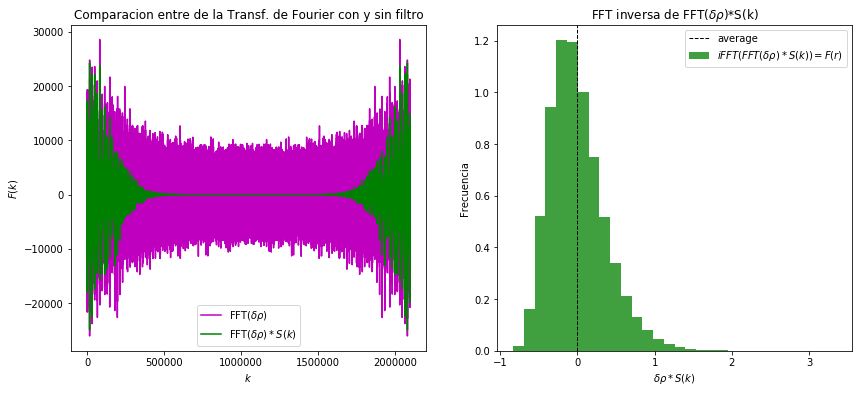

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Comparacion entre de la Transf. de Fourier con y sin filtro')
plt.plot(real.flatten(), color='m', label="FFT($\\delta\\rho$)")
plt.plot(fft_filtro.flatten(), color='g', label="FFT$(\\delta\\rho)*S(k)$")
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$F(k)$')
plt.subplot(1,2,2)
plt.title('FFT inversa de FFT($\\delta\\rho$)*S(k)')
n, bins, patches = plt.hist(np.real(inv_fft_filtro).flatten(), 30, normed=1, facecolor='g', alpha=0.75,label="$iFFT(FFT(\\delta\\rho)*S(k))=F(r)$")
plt.axvline(np.real(inv_fft_filtro).flatten().mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.legend()
plt.xlabel('$\\delta\\rho*S(k)$')
plt.ylabel('Frecuencia')
plt.savefig("/home/izamar/Downloads/plots_tesis/fftdeltarho_fftdeltarho_smoot+hist.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/fftdeltarho_fftdeltarho_smoot+hist.pdf")
plt.show()

In [18]:
N=Ngrid 
bias=2.1

In [26]:
#aproximacion de zeldovich completa y normalizada 
#\\Phi(k)=(-ik/k2)*delta(k)

##se ocupa en el espacio de configuración entonces fft_filtro (cantidades en el espacio de fourier)
## ocupar las operaciones a la parte imaginaria y real (aplicarlo por separado)
##el i invierte la parte real a imaginaria, corregir la apriximación de zeldovich 
##cambiar los nombres

In [19]:
dx=np.zeros((N,N,N))  
dy=np.zeros((N,N,N))
dz=np.zeros((N,N,N))

dxr=np.zeros((N,N,N))  
dyr=np.zeros((N,N,N))
dzr=np.zeros((N,N,N))

dxi=np.zeros((N,N,N))  
dyi=np.zeros((N,N,N))
dzi=np.zeros((N,N,N))

In [20]:
###mmmm posible corrección de la aproximación de Zeldovich

##utilizar fft_filtro pues está en el espacio de fourier 

#zeldovich pero calculado con todo Tdeltan(parte real y compleja),
#luego separa la parte real y compleja en dxr y dxi
factor=1/bias
for ii in range(N):
    for jj in range(N):
        for kk in range(N):
            k2=(k_arr2[ii])**2 + (k_arr2[jj])**2 + (k_arr2[kk])**2
            if k2==0:
                k2=dk
            dxr[ii,jj,kk]=(np.imag(fft_filtro[ii,jj,kk])*k_arr2[ii]/k2)*factor
            dyr[ii,jj,kk]=(np.imag(fft_filtro[ii,jj,kk])*k_arr2[jj]/k2)*factor
            dzr[ii,jj,kk]=(np.imag(fft_filtro[ii,jj,kk])*k_arr2[kk]/k2)*factor
            
            dxi[ii,jj,kk]=(-np.real(fft_filtro[ii,jj,kk])*k_arr2[ii]/k2)*factor
            dyi[ii,jj,kk]=(-np.real(fft_filtro[ii,jj,kk])*k_arr2[jj]/k2)*factor
            dzi[ii,jj,kk]=(-np.real(fft_filtro[ii,jj,kk])*k_arr2[kk]/k2)*factor

##para cambiar entre espacios (fourier y de configuración) utilizar la transformada inversa             

In [21]:
dx_tot=dxr+1.j*dxi
dy_tot=dyr+1.j*dyi
dz_tot=dzr+1.j*dzi
#print dx_tot

In [22]:
#psi_x=np.fft.ifftn(dx_tot, norm='ortho')
psi_x=np.fft.ifftn(dx_tot)
psi_y=np.fft.ifftn(dy_tot)
psi_z=np.fft.ifftn(dz_tot) 


In [23]:
psi_x.shape
print N

128


In [24]:
%matplotlib inline

print ('Mínimos')
print np.min(psi_x)
print np.min(psi_y)
print np.min(psi_z)

print ('----------------------------------')

print ('Máximos')
print np.max(psi_x)
print np.max(psi_y)
print np.max(psi_z)

Mínimos
(-12.517791898093533-2.1459545176600425e-10j)
(-11.564766843165302-7.800896615852912e-10j)
(-12.157404985988439-7.630138058554623e-10j)
----------------------------------
Máximos
(10.803763960550413-2.024856886555644e-10j)
(11.772087336209538+2.6544780053908547e-10j)
(11.879563080731042-3.7280750278270466e-10j)


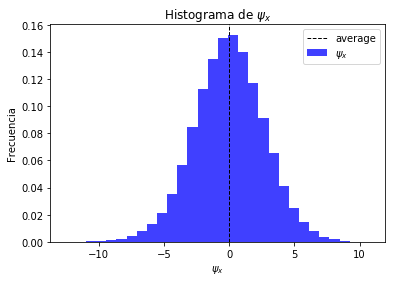

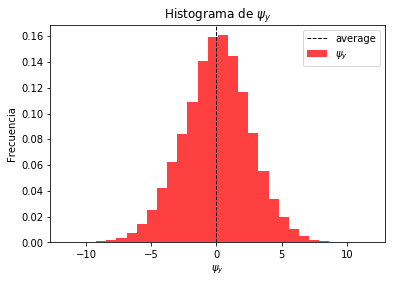

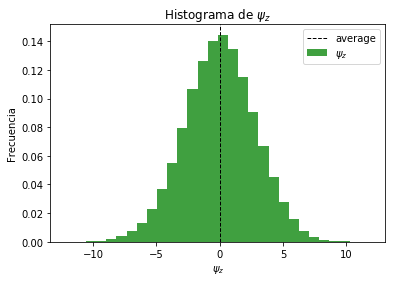

In [41]:
#Histograma
#plt.hist((np.real(psi_x)).flatten)
#plt.hist(np.real(psi_x))
#plt.hist(dxr[:,0,0],

n, bins, patches = plt.hist(np.real(psi_x.flatten()), 30, normed=1, facecolor='b', alpha=0.75, label="$\psi_x$")
plt.title('Histograma de $\psi_x$')
plt.axvline(np.real(psi_x.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_x$')####cambiar para todas
plt.ylabel('Frecuencia')
#plt.grid(True)
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_psi_x.png")
plt.show()

n, bins, patches = plt.hist(np.real(psi_y.flatten()), 30, normed=1, facecolor='r', alpha=0.75, label="$\psi_y$")
plt.title('Histograma de $\psi_y$')
plt.axvline(np.real(psi_y.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_y$')
plt.ylabel('Frecuencia')
plt.legend()
#plt.grid(True)
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_psi_y.png")
plt.show()

n, bins, patches = plt.hist(np.real(psi_z.flatten()), 30, normed=1, facecolor='g', alpha=0.75, label="$\psi_z$")
plt.title('Histograma de $\psi_z$')
plt.axvline(np.real(psi_z.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_z$')
plt.ylabel('Frecuencia')
plt.legend()
#plt.grid(True)
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_psi_z.png")
plt.show()

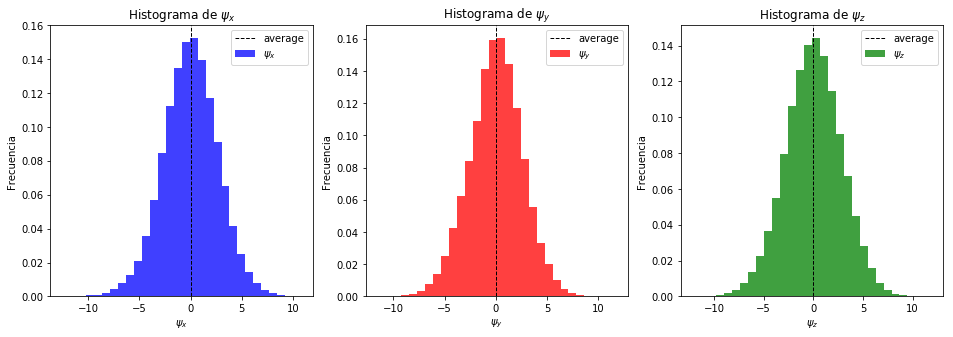

In [33]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(np.real(psi_x.flatten()), 30, normed=1, facecolor='b', alpha=0.75, label="$\psi_x$")
plt.title('Histograma de $\psi_x$')
plt.axvline(np.real(psi_x.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_x$')####cambiar para todas
plt.ylabel('Frecuencia')
#plt.grid(True)
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(np.real(psi_y.flatten()), 30, normed=1, facecolor='r', alpha=0.75, label="$\psi_y$")
plt.title('Histograma de $\psi_y$')
plt.axvline(np.real(psi_y.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_y$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(np.real(psi_z.flatten()), 30, normed=1, facecolor='g', alpha=0.75, label="$\psi_z$")
plt.title('Histograma de $\psi_z$')
plt.axvline(np.real(psi_z.flatten()).mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$\psi_z$')
plt.ylabel('Frecuencia')
plt.legend()
#plt.grid(True)
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_psi_3.png")
plt.show()

#plt.subplot(2,2,4)
#plt.show()

In [34]:
#Posiciones reconstruidas
#ya tengo la aproximación de Zeldovich dx,dy,dz (en el espacio de fourier)
#psi_x,psi_y,psi_z en el espacio de configuración 

x_r = np.zeros(len(x))  
y_r = np.zeros(len(y))
z_r = np.zeros(len(z))

In [35]:
#index_x = np.int(np.floor((x-x_min)/delta_pix)) 

In [35]:
#aqui se psi_x,psi_y,psi_z con la longitud de x,y,z

for n_part in range(0,nx):
    index_x = int(np.floor((x[n_part]-x_min)/delta_pix))
    index_y = int(np.floor((y[n_part]-y_min)/delta_pix))
    index_z = int(np.floor((z[n_part]-z_min)/delta_pix))
    
    x_r[n_part]-=np.real(psi_x[index_x,index_y,index_z])
    y_r[n_part]-=np.real(psi_y[index_x,index_y,index_z])
    z_r[n_part]-=np.real(psi_z[index_x,index_y,index_z])
    
#se obtienen la correccion de reconstruccion con la longitud de las posiciones originales 
    

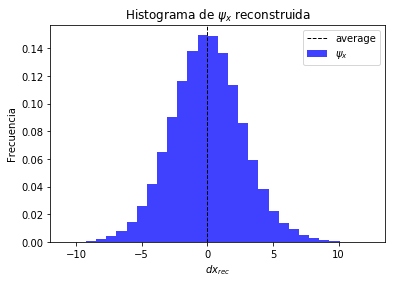

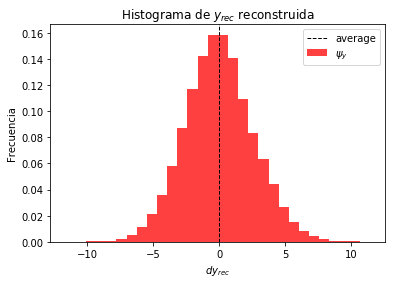

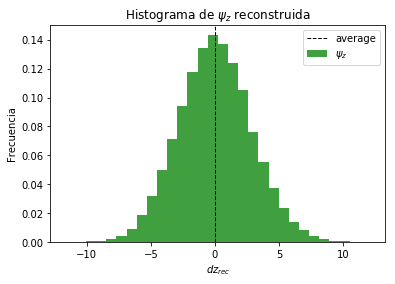

In [37]:
#estos son los histogramas de las psi reconstruidas con la longitud de las posiciones originales
#deben quedar igual que los histogramas anteriores pues sigue siendo psi_x,psi_y,psi_z


#####esto es delta

n, bins, patches = plt.hist(x_r, 30, normed=1, facecolor='b', alpha=0.75, label="$\psi_x$")
plt.title('Histograma de $\psi_x$ reconstruida')
plt.axvline(x_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_xrec.png")
plt.show()

n, bins, patches = plt.hist(y_r, 30, normed=1, facecolor='r', alpha=0.75, label="$\psi_y$")
plt.title('Histograma de $y_{rec}$ reconstruida')
plt.axvline(y_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_yrec.png")
plt.show()

n, bins, patches = plt.hist(z_r, 30, normed=1, facecolor='g', alpha=0.75, label="$\psi_z$")
plt.title('Histograma de $\psi_z$ reconstruida')
plt.axvline(z_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec.png")
plt.show()

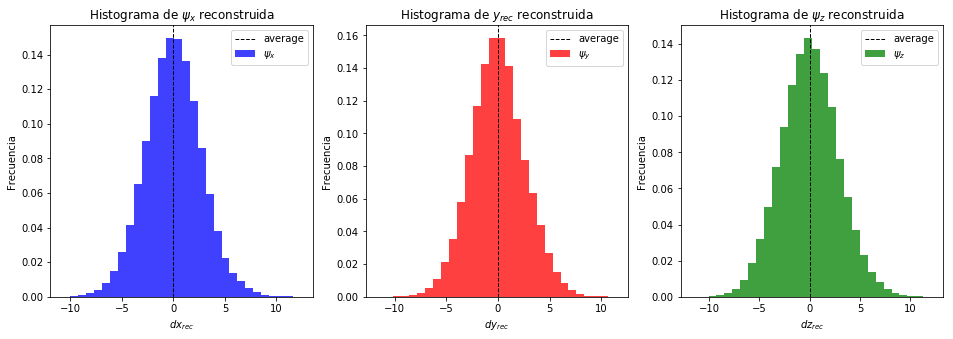

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_r, 30, normed=1, facecolor='b', alpha=0.75, label="$\psi_x$")
plt.title('Histograma de $\psi_x$ reconstruida')
plt.axvline(x_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_r, 30, normed=1, facecolor='r', alpha=0.75, label="$\psi_y$")
plt.title('Histograma de $y_{rec}$ reconstruida')
plt.axvline(y_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_r, 30, normed=1, facecolor='g', alpha=0.75, label="$\psi_z$")
plt.title('Histograma de $\psi_z$ reconstruida')
plt.axvline(z_r.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{rec}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_3.png")
plt.show()


In [37]:
print len(x)
print len(x_r)

print x[0]
print x_r[0]

816550
816550
16.744709
-3.523836045805029


In [38]:
#ahora se resta la correccion a las posiciones originales

x_rec=x-x_r
y_rec=y-y_r
z_rec=z-z_r

In [39]:
x_hist_rec=x-x_rec
y_hist_rec=y-y_rec
z_hist_rec=z-z_rec

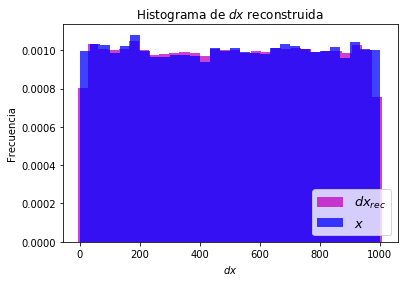

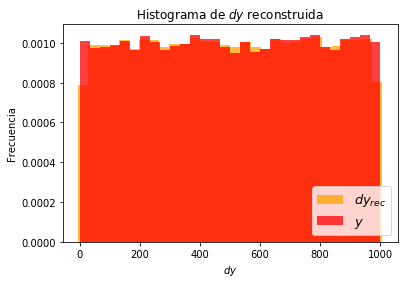

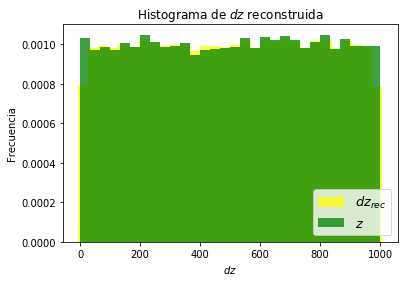

In [41]:
#estos plots no se usaran

n, bins, patches = plt.hist(x_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
n, bins, patches = plt.hist(x, 30, normed=1, facecolor='b', alpha=0.75, label="$x$")
#n, bins, patches = plt.hist(np.real(psi_x.flatten()), 30, normed=1, facecolor='b', alpha=0.75, label="$dx$")
plt.title('Histograma de $dx$ reconstruida')
#plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average $dx_{rec}$')
#plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1,label='average $x$')
#plt.axvline(np.real(psi_x.flatten()).mean(), color='r', linestyle='dashed', linewidth=1,label='average $dx$')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()
plt.legend(fontsize=13,loc='lower right')
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_xrec_dx.png")
plt.show()

n, bins, patches = plt.hist(y_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
n, bins, patches = plt.hist(y, 30, normed=1, facecolor='r', alpha=0.75, label="$y$")
plt.title('Histograma de $dy$ reconstruida')
#plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average $dy_{rec}$')
#n, bins, patches = plt.hist(np.real(psi_y.flatten()), 30, normed=1, facecolor='orange', alpha=0.75, label="$dy$")
#plt.axvline(np.real(psi_y.flatten()).mean(), color='b', linestyle='dashed', linewidth=1,label='average $dy$')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()
plt.legend(fontsize=13,loc='lower right')
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_yrec_dy.png")
plt.show()

n, bins, patches = plt.hist(z_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
n, bins, patches = plt.hist(z, 30, normed=1, facecolor='g', alpha=0.75, label="$z$")
plt.title('Histograma de $dz$ reconstruida')
#plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average $dz_{rec}$')
#n, bins, patches = plt.hist(np.real(psi_z.flatten()), 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz$")
#plt.axvline(np.real(psi_z.flatten()).mean(), color='r', linestyle='dashed', linewidth=1,label='average $dz$')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.legend(fontsize=13,loc='lower right')
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_dz.png")
plt.show()

<function matplotlib.pyplot.show>

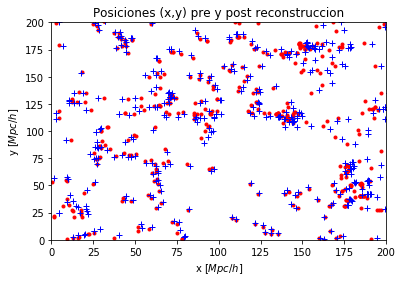

In [47]:

tmp=np.where((z>np.min(z))&(z<=np.min(z)+10))
tmp=tmp[0]
plt.plot(x[tmp],y[tmp],'.',color='red')
plt.plot(x_rec[tmp],y_rec[tmp],'+',color='blue')#ms=0.9

"""
for i in range(10000):
    plt.plot(x[i],y[i], '.', color='red')
"""
plt.xlim(0,200)
plt.ylim(0,200)

#for i in range(1500):
    #plt.plot(x[i],y[i], '.', color='red')
    #plt.plot(x_rec[i],y_rec[i], '.', color='blue')
plt.title('Posiciones (x,y) pre y post reconstruccion')
plt.xlabel('x $[Mpc/h]$')
plt.ylabel('y $[Mpc/h]$')
plt.legend()
plt.legend(frameon=False)
#plt.gca().legend('puntos pre-rec','puntos post-rec')
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre-post_1500.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre-post_1500.pdf")
plt.show

In [48]:
#este archivo son las posiciones reconstruidas 

#np.savetxt('HOD_GR_B1024_Box1.rec.dat',np.transpose([x_r,y_r,z_r]))
#np.savetxt('HOD_GR_B1024_Box1.rec.dat',np.transpose([x_rec,y_rec,z_rec]))
np.savetxt('mock_1_tinker13_standard_z_0.695.rec.txt',np.transpose([x_rec,y_rec,z_rec,w]))

In [49]:
#se generan las posiciones random 
#este archivo de random no incluye el proceso de reconstruccion 

x_ran=np.random.rand(nx)*boxsize
y_ran=np.random.rand(nx)*boxsize
z_ran=np.random.rand(nx)*boxsize

#np.savetxt('random_B1024_Box1.dat',np.transpose([x_ran,y_ran,z_ran]))
np.savetxt('mock_1_tinker13_standard_z_0.695.ran.txt',np.transpose([x_ran,y_ran,z_ran,w]))
print x_ran[0]

126.08401828001415


In [50]:
#se generan las posiciones random con reconstrucción 

x_ran_r = np.zeros(len(x))
y_ran_r = np.zeros(len(y))
z_ran_r = np.zeros(len(z))

print len(x_ran)

print nx
print len(x_ran_r)



816550
816550
816550


In [51]:
for n_part in range(0,nx):
    index_x = int(np.floor((x_ran[n_part]-x_min)/delta_pix))
    index_y = int(np.floor((y_ran[n_part]-y_min)/delta_pix))
    index_z = int(np.floor((z_ran[n_part]-z_min)/delta_pix))
    #if index_x>126 or index_y>126 or index_z>126: continue
    
    x_ran_r[n_part]-=np.real(psi_x[index_x,index_y,index_z])
    y_ran_r[n_part]-=np.real(psi_y[index_x,index_y,index_z])
    z_ran_r[n_part]-=np.real(psi_z[index_x,index_y,index_z])


In [52]:
x_ran_rec=x_ran-x_ran_r
y_ran_rec=y_ran-y_ran_r
z_ran_rec=z_ran-z_ran_r

print x_ran_rec[0]

128.9026540556899


In [53]:
#np.savetxt('random_B1024_Box1.ran.dat',np.transpose([x_ran_rec,y_ran_rec,z_ran_rec]))
np.savetxt('mock_1_tinker13_standard_z_0.695.ran.rec.txt',np.transpose([x_ran_rec,y_ran_rec,z_ran_rec,w]))

In [49]:
#Correcciones de corrimiento al rojo, RDS
#se restara la correccion a las posiciones pre y post reconstruccion 

#ffile='redshift_0.695/tinker13/standard/mock_'+str(i)+'_tinker13_standard_z_0.695'
#x,y, z, vz=np.loadtxt(ffile+'.txt', unpack=True, usecols=(0,1,2,5))

#usando las velocidades
#red=0.695
#Om=0.26479
#print(np.min(z), np.max(z))
#scale_factor=1./(1+red)
#w=np.ones(len(z))
#z=z+vz/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#print z
#out=np.where(z >1000)
#z[out]+=1000
#out=np.where(z <0)
#z[out]+=1000

#np.savetxt(ffile+'_red.txt', np.transpose([x,y,z,w]))
#print(np.min(z), np.max(z))
    
    

In [40]:
#Correcciones de corrimiento al rojo, RDS
#se restara la correccion a las posiciones pre y post reconstruccion 

#parametros 
red=0.695
Om=0.26479
scale_factor=1./(1+red)
w=np.ones(len(z))

In [51]:
#aplicar la correccion por RSD a los datos pre-rec

#x_rsd=x+vx/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#y_rsd=y+vy/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#z_rsd=z+vz/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))

In [41]:
r2=x*x+y*y+z*z
vr=x*vx+y*vy+z*vz
#scale_factor=1./(1+red)
factor=1.0/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
x_rsd=x+factor*x*vr/r2  #forma correcta de RSD
y_rsd=y+factor*y*vr/r2
z_rsd=z+factor*z*vr/r2

In [56]:
print x[0]
print x_rsd[0]

16.744709
16.299895275895675


<function matplotlib.pyplot.show>

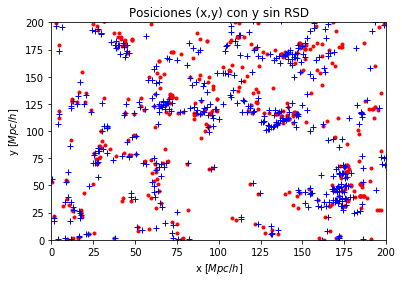

In [57]:
#Plots comparando las posiciones originales con y sin la correccion por RSD

#for i in range(1500):
plt.plot(x[tmp],y[tmp], '.', color='red')
plt.plot(x_rsd[tmp],y_rsd[tmp], '+', color='blue')
plt.title('Posiciones (x,y) con y sin RSD')
plt.xlabel('x $[Mpc/h]$')
plt.ylabel('y $[Mpc/h]$')
plt.xlim(0,200)
plt.ylim(0,200)
plt.legend()
plt.legend(frameon=False)
#plt.gca().legend('puntos pre-rec','puntos post-rec')
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre_rsd_1500.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre_rsd_1500.pdf")
plt.show

In [42]:
#restar las posiciones para hacer los histogramas

x_hist_rsd=x-x_rsd
y_hist_rsd=y-y_rsd
z_hist_rsd=z-z_rsd

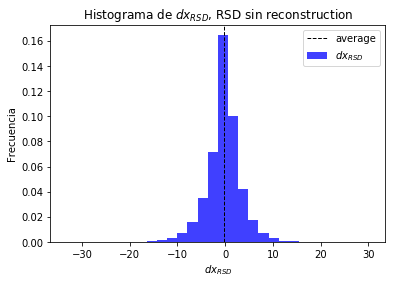

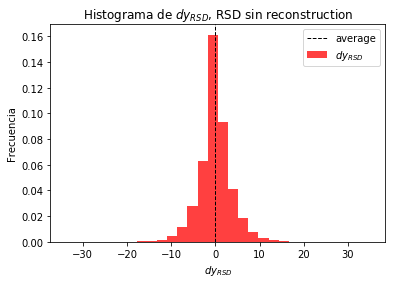

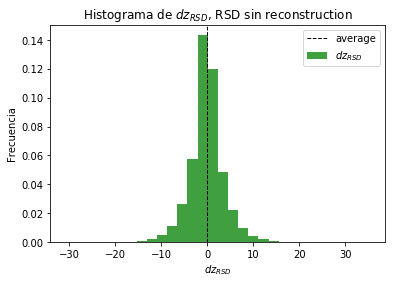

In [59]:
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
plt.title('Histograma de $dx_{RSD}$, RSD sin reconstruction')
plt.axvline(x_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_x_rsd.png")
plt.show()

n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
plt.title('Histograma de $dy_{RSD}$, RSD sin reconstruction')
plt.axvline(y_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_y_rsd.png")
plt.show()

n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
plt.title('Histograma de $dz_{RSD}$, RSD sin reconstruction')
plt.axvline(z_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_z_rsd.png")
plt.show()

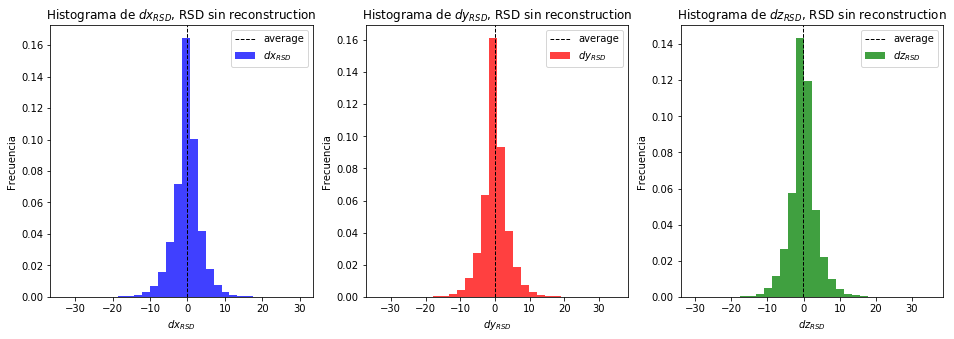

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
plt.title('Histograma de $dx_{RSD}$, RSD sin reconstruction')
plt.axvline(x_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
plt.title('Histograma de $dy_{RSD}$, RSD sin reconstruction')
plt.axvline(y_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
plt.title('Histograma de $dz_{RSD}$, RSD sin reconstruction')
plt.axvline(z_hist_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_z_rsd_3.png")
plt.show()


In [60]:
#guardar las posiciones con RSD sin aplicar reconstruccion 

#np.savetxt('HOD_GR_B1024_Box1.rsd.dat',np.transpose([x_rsd,y_rsd,z_rsd]))
np.savetxt('mock_1_tinker13_standard_z_0.695.rsd.txt',np.transpose([x_rsd,y_rsd,z_rsd,w]))

In [58]:
#r2_rec=x_rec*x_rec+y_rec*y_rec+z_rec*z_rec
#vr_rec=x_rec*vx+y_rec*vy+z_rec*vz

In [44]:
#Aplicar RSD a los datos post-rec

#x_rsd_rec=x_rec+vx/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#y_rsd_rec=y_rec+vy/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#z_rsd_rec=z_rec+vz/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))

x_rsd_rec=x_rec+factor*x_rec*vr/r2
y_rsd_rec=y_rec+factor*y_rec*vr/r2
z_rsd_rec=z_rec+factor*z_rec*vr/r2

x_rsd_rec2=x_rec+factor*x_rec*vr/r2

print x_rsd_rec[0]
print x_rsd_rec2[0]

19.730122610156805
19.730122610156805


In [45]:
print x[0]
print x_rec[0]
print x_rsd[0]
print x_rsd_rec[0]
print x_rsd_rec2[0]

16.744709
20.26854504580503
16.299895275895675
19.730122610156805
19.730122610156805


<function matplotlib.pyplot.show>

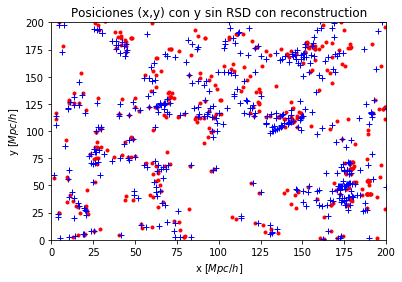

In [63]:
#Plots comparando las posiciones originales con y sin la correccion por RSD

#for i in range(1500):
plt.plot(x_rec[tmp],y_rec[tmp], '.', color='red')
plt.plot(x_rsd_rec[tmp],y_rsd_rec[tmp], '+', color='blue')
plt.title('Posiciones (x,y) con y sin RSD con reconstruction')
plt.xlabel('x $[Mpc/h]$')
plt.ylabel('y $[Mpc/h]$')
plt.xlim(0,200)
plt.ylim(0,200)
plt.legend()
plt.legend(frameon=False)
#plt.gca().legend('puntos pre-rec','puntos post-rec')
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre-post_rsd_1500.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre-post_rsd_1500.pdf")
plt.show

In [46]:
#restar las posiciones para hacer los histogramas

x_hist_rec_rsd=x_rec-x_rsd_rec
y_hist_rec_rsd=y_rec-y_rsd_rec
z_hist_rec_rsd=z_rec-z_rsd_rec

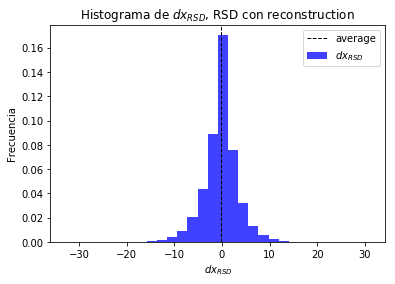

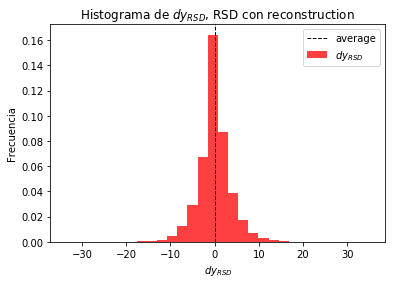

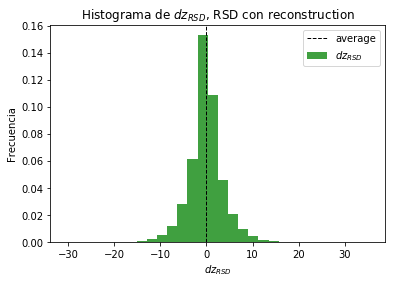

In [65]:
n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
plt.title('Histograma de $dx_{RSD}$, RSD con reconstruction')
plt.axvline(x_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_xrec_rsd.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_xrec_rsd.pdf")
plt.show()

n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
plt.title('Histograma de $dy_{RSD}$, RSD con reconstruction')
plt.axvline(y_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_yrec_rsd.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_yrec_rsd.pdf")
plt.show()

n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
plt.title('Histograma de $dz_{RSD}$, RSD con reconstruction')
plt.axvline(z_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_rsd.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_rsd.pdf")
plt.show()

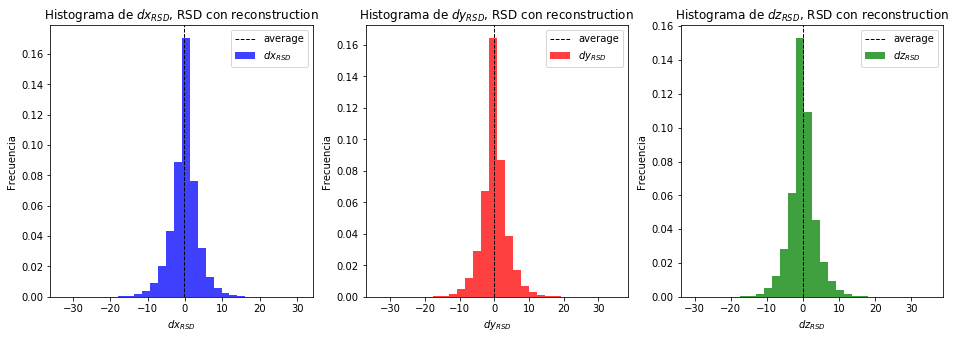

In [47]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
plt.title('Histograma de $dx_{RSD}$, RSD con reconstruction')
plt.axvline(x_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
plt.title('Histograma de $dy_{RSD}$, RSD con reconstruction')
plt.axvline(y_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
plt.title('Histograma de $dz_{RSD}$, RSD con reconstruction')
plt.axvline(z_hist_rec_rsd.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz_{RSD}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_rsd_3.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_zrec_rsd_3.pdf")
plt.show()

In [66]:
#guardar las posiciones con RSD aplicando la reconstruccion 

#np.savetxt('HOD_GR_B1024_Box1.rsd.rec.dat',np.transpose([x_rsd_rec,y_rsd_rec,z_rsd_rec]))
np.savetxt('mock_1_tinker13_standard_z_0.695.rsd.rec.txt',np.transpose([x_rsd_rec,y_rsd_rec,z_rsd_rec,w]))

In [67]:
#Aplicar RSD a los datos random pre-rec

#r2=x*x+y*y+z*z
#vr=x*vx+y*vy+z*vz
#scale_factor=1./(1+red)
#factor=1.0/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#x_rsd=x+factor*x*vr/r2

#x_rsd_ran=x_ran+vx/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#y_rsd_ran=y_ran+vy/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#z_rsd_ran=z_ran+vz/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))

x_rsd_ran=x_ran+factor*x_ran*vr/r2
y_rsd_ran=y_ran+factor*y_ran*vr/r2
z_rsd_ran=z_ran+factor*z_ran*vr/r2

In [68]:
#guardar las poosiciones con RSD de los datos random sin reconstruccion

#np.savetxt('HOD_GR_B1024_Box1.rsd.ran.dat',np.transpose([x_rsd_ran,y_rsd_ran,z_rsd_ran]))
np.savetxt('mock_1_tinker13_standard_z_0.695.rsd.ran.txt',np.transpose([x_rsd_ran,y_rsd_ran,z_rsd_ran,w]))

In [69]:
#Aplicar RSD a los datos random post-rec

#x_rsd_ran_rec=x_ran_rec+vx/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#y_rsd_ran_rec=y_ran_rec+vy/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))
#z_rsd_ran_rec=z_ran_rec+vz/(100.*scale_factor*np.sqrt(Om*np.power(scale_factor,-3)+1-Om))

x_rsd_ran_rec=x_ran_rec+factor*x_ran_rec*vr/r2
y_rsd_ran_rec=y_ran_rec+factor*y_ran_rec*vr/r2
z_rsd_ran_rec=z_ran_rec+factor*z_ran_rec*vr/r2

In [70]:
#guardar las posiciones con RSD de los datos random con reconstruccion 

#np.savetxt('HOD_GR_B1024_Box1.rsd.ran.rec.dat',np.transpose([x_rsd_ran_rec,y_rsd_ran_rec,z_rsd_ran_rec]))
np.savetxt('mock_1_tinker13_standard_z_0.695.rsd.ran.rec.txt',np.transpose([x_rsd_ran_rec,y_rsd_ran_rec,z_rsd_ran_rec,w]))

<function matplotlib.pyplot.show>

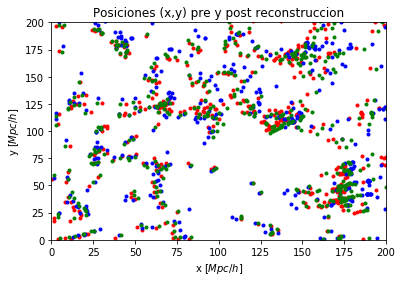

In [48]:
#Comparacion de los plots con y sin RSD para pre-rec y post-rec


#for i in range(1500):
#plt.plot(x[tmp],y[tmp], '.', color='pink')
plt.plot(x_rsd[tmp],y_rsd[tmp], '.', color='red')
plt.plot(x_rec[tmp],y_rec[tmp], '.', color='blue')
plt.plot(x_rsd_rec[tmp],y_rsd_rec[tmp], '.', color='green')
plt.title('Posiciones (x,y) pre y post reconstruccion')
plt.xlabel('x $[Mpc/h]$')
plt.ylabel('y $[Mpc/h]$')
plt.xlim(0,200)
plt.ylim(0,200)
plt.legend()
plt.legend(frameon=False)
#plt.gca().legend('puntos pre-rec','puntos post-rec')
plt.savefig("/home/izamar/Downloads/plots_tesis/puntos_pre-post_todas.png")
plt.show

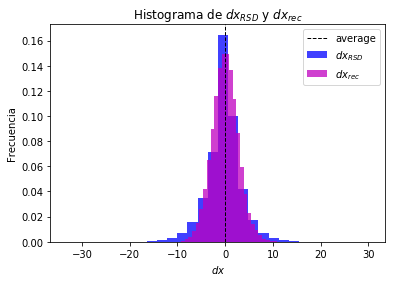

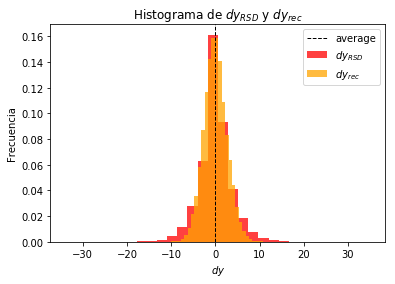

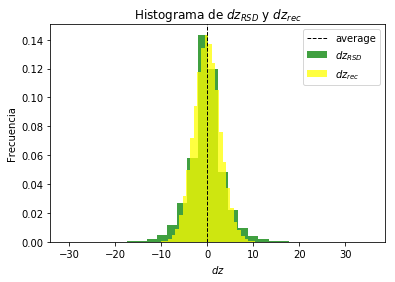

In [72]:
##histogramas de dx,dy,dz con reconstruccion comparando con rsd(aplicado a posiciones sin rec)

n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de $dx_{RSD}$ y $dx_{rec}$')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dx_rsd_rec.png")
plt.show()

n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de $dy_{RSD}$ y $dy_{rec}$')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dy_rsd_rec.png")
plt.show()

n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de $dz_{RSD}$ y $dz_{rec}$')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dz_rsd_rec.png")
plt.show()

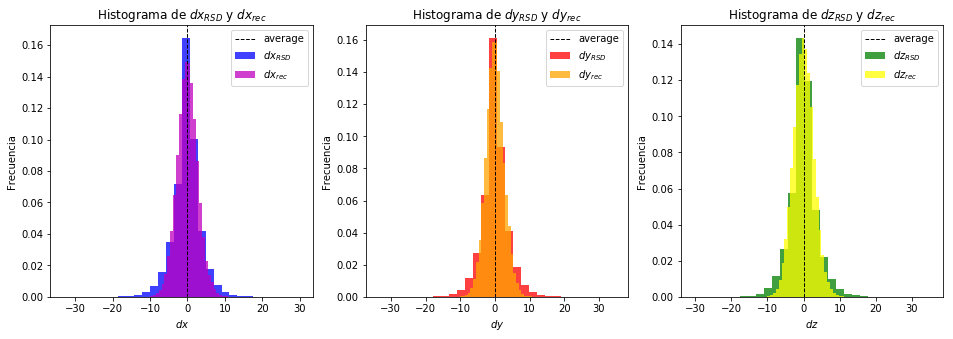

In [49]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de $dx_{RSD}$ y $dx_{rec}$')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de $dy_{RSD}$ y $dy_{rec}$')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de $dz_{RSD}$ y $dz_{rec}$')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dz_rsd_rec_3.png")
plt.show()

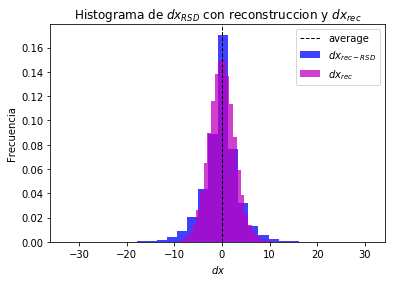

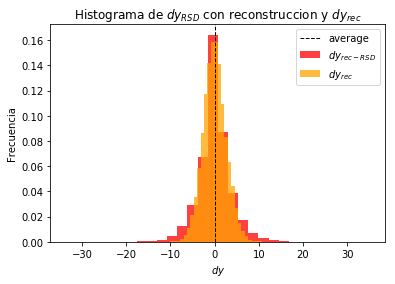

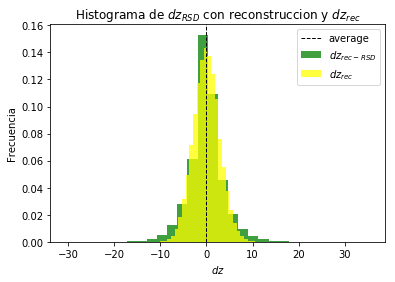

In [73]:
##histogramas de dx,dy,dz con reconstruccion comparando con rsd(aplicado a posiciones con rec)

n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de $dx_{RSD}$ con reconstruccion y $dx_{rec}$')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dxrec_rsd.png")
plt.show()

n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de $dy_{RSD}$ con reconstruccion y $dy_{rec}$')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dyrec_rsd.png")
plt.show()

n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de $dz_{RSD}$ con reconstruccion y $dz_{rec}$')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrec_rsd.png")
plt.show()

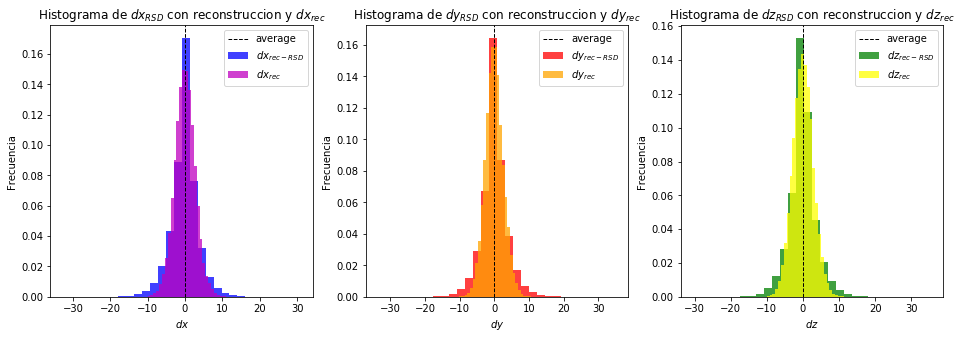

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de $dx_{RSD}$ con reconstruccion y $dx_{rec}$')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de $dy_{RSD}$ con reconstruccion y $dy_{rec}$')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de $dz_{RSD}$ con reconstruccion y $dz_{rec}$')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrec_rsd_3.png")
plt.show()

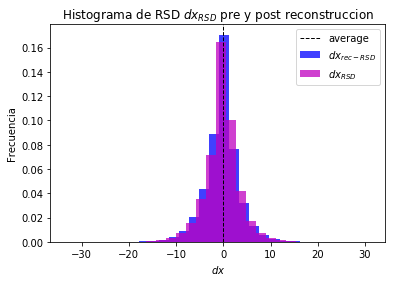

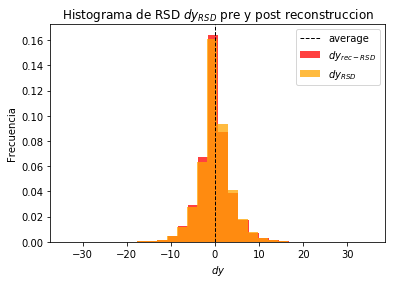

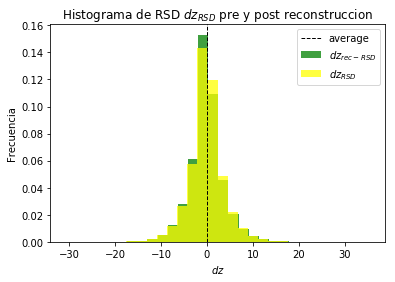

In [74]:
## Comparacion de RSD con y sin reconstruction 

n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{RSD}$")
#n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de RSD $dx_{RSD}$ pre y post reconstruccion')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dxrsd_pre-post.png")
plt.show()

n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{RSD}$")
#n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de RSD $dy_{RSD}$ pre y post reconstruccion')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dyrsd_pre-post.png")
plt.show()

n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{RSD}$")
#n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de RSD $dz_{RSD}$ pre y post reconstruccion')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrsd_pre-post.png")
plt.show()

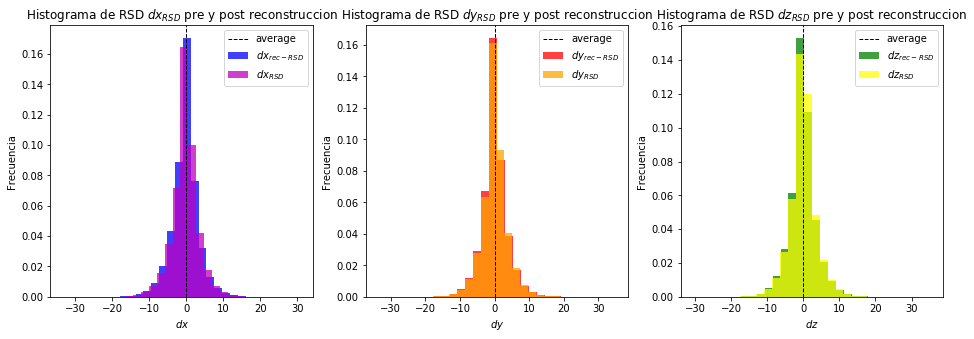

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{RSD}$")
#n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de RSD $dx_{RSD}$ pre y post reconstruccion')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{RSD}$")
#n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de RSD $dy_{RSD}$ pre y post reconstruccion')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{RSD}$")
#n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de RSD $dz_{RSD}$ pre y post reconstruccion')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrsd_pre-post_3.png")
plt.show()

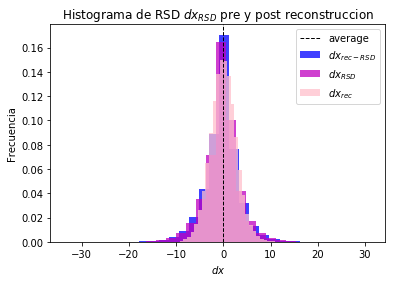

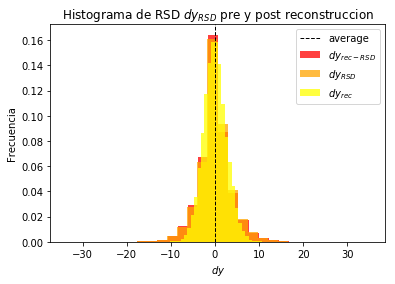

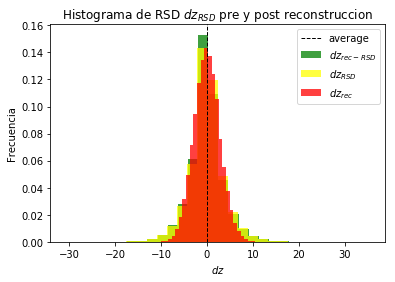

In [75]:
## Comparacion de RSD con y sin reconstruction 

n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='pink', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de RSD $dx_{RSD}$ pre y post reconstruccion')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dxrsd_todas.png")
plt.show()

n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de RSD $dy_{RSD}$ pre y post reconstruccion')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dyrsd_todas.png")
plt.show()

n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='red', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de RSD $dz_{RSD}$ pre y post reconstruccion')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrsd_todas.png")
plt.show()

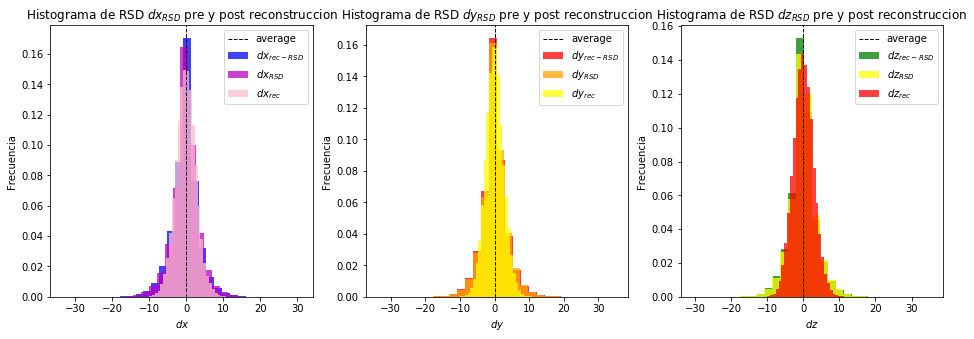

In [52]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(x_hist_rec_rsd, 30, normed=1, facecolor='b', alpha=0.75, label="$dx_{rec-RSD}$")
n, bins, patches = plt.hist(x_hist_rsd, 30, normed=1, facecolor='m', alpha=0.75, label="$dx_{RSD}$")
n, bins, patches = plt.hist(x_hist_rec, 30, normed=1, facecolor='pink', alpha=0.75, label="$dx_{rec}$")
plt.title('Histograma de RSD $dx_{RSD}$ pre y post reconstruccion')
plt.axvline(x_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dx$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,2)
n, bins, patches = plt.hist(y_hist_rec_rsd, 30, normed=1, facecolor='r', alpha=0.75, label="$dy_{rec-RSD}$")
n, bins, patches = plt.hist(y_hist_rsd, 30, normed=1, facecolor='orange', alpha=0.75, label="$dy_{RSD}$")
n, bins, patches = plt.hist(y_hist_rec, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dy_{rec}$")
plt.title('Histograma de RSD $dy_{RSD}$ pre y post reconstruccion')
plt.axvline(y_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dy$')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1,3,3)
n, bins, patches = plt.hist(z_hist_rec_rsd, 30, normed=1, facecolor='g', alpha=0.75, label="$dz_{rec-RSD}$")
n, bins, patches = plt.hist(z_hist_rsd, 30, normed=1, facecolor='yellow', alpha=0.75, label="$dz_{RSD}$")
n, bins, patches = plt.hist(z_hist_rec, 30, normed=1, facecolor='red', alpha=0.75, label="$dz_{rec}$")
plt.title('Histograma de RSD $dz_{RSD}$ pre y post reconstruccion')
plt.axvline(z_hist_rec.mean(), color='k', linestyle='dashed', linewidth=1,label='average')
plt.xlabel('$dz$')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/hist_dzrsd_todas_3.png")
plt.show()

Después de calcular la función de correlación y los términos del estimador Landy-Szalay, se obtiene el Monopolo y Cuadrupolo

In [3]:
#r, xi = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.xi', usecols=(1, 2), unpack=True)
#mu_rec, r_rec, xi_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rec.xi', usecols=(0, 1, 2), unpack=True)
#mu_rsd, r_rsd, xi_rsd = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.xi', usecols=(0, 1, 2), unpack=True)
#mu_rsd_rec, r_rsd_rec, xi_rsd_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.rec.xi', usecols=(0, 1, 2), unpack=True)

#r, xi = np.loadtxt('/home/izamar/Downloads/mock_1_tinker13_standard_z_0.695.corr.rec2.xi', usecols=(1, 2), unpack=True)
r, xi = np.loadtxt('/home/izamar/Downloads/mock_1_tinker13_standard_z_0.695.3d_rm.prueba.xi', usecols=(1, 2), unpack=True)
mu_rec, r_rec, xi_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rec.xi', usecols=(0, 1, 2), unpack=True)
mu_rsd, r_rsd, xi_rsd = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.xi', usecols=(0, 1, 2), unpack=True)
mu_rsd_rec, r_rsd_rec, xi_rsd_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.rec.xi', usecols=(0, 1, 2), unpack=True)



<function matplotlib.pyplot.show(*args, **kw)>

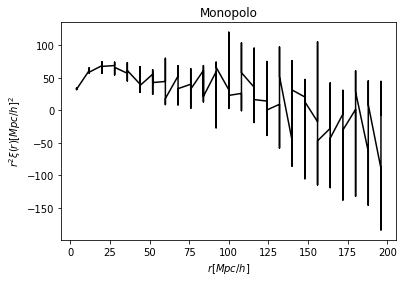

In [4]:
plt.plot(r, xi*r**2, color='black', label='original')
#plt.plot(r_rec, xi_rec*r_rec**2, color='green', label='rec')
#plt.plot(r_rsd, xi_rsd*r_rsd**2, color='blue', label='rsd')
#plt.plot(r_rsd_rec, xi_rsd_rec*r_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
#plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_original.png")
plt.show

In [9]:
#r1, mono, quad = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.mul', usecols=(0, 1, 2), unpack=True)
#mock_1_tinker13_standard_z_0.695.3d_rm.xi.mul_5bin

r1, mono, quad = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)
#r1_rec, mono_rec, quad_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rec.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)
#r1_rsd, mono_rsd, quad_rsd = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)
#r1_rsd_rec, mono_rsd_rec, quad_rsd_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.rec.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)


#r1, mono, quad = np.loadtxt('/home/izamar/Downloads/', usecols=(0, 1, 2), unpack=True)
r1_rec, mono_rec, quad_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rec.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)
r1_rsd, mono_rsd, quad_rsd = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)
r1_rsd_rec, mono_rsd_rec, quad_rsd_rec = np.loadtxt('mock_1_tinker13_standard_z_0.695.3d_rm.rsd.rec.xi.mul_25bin', usecols=(0, 1, 2), unpack=True)

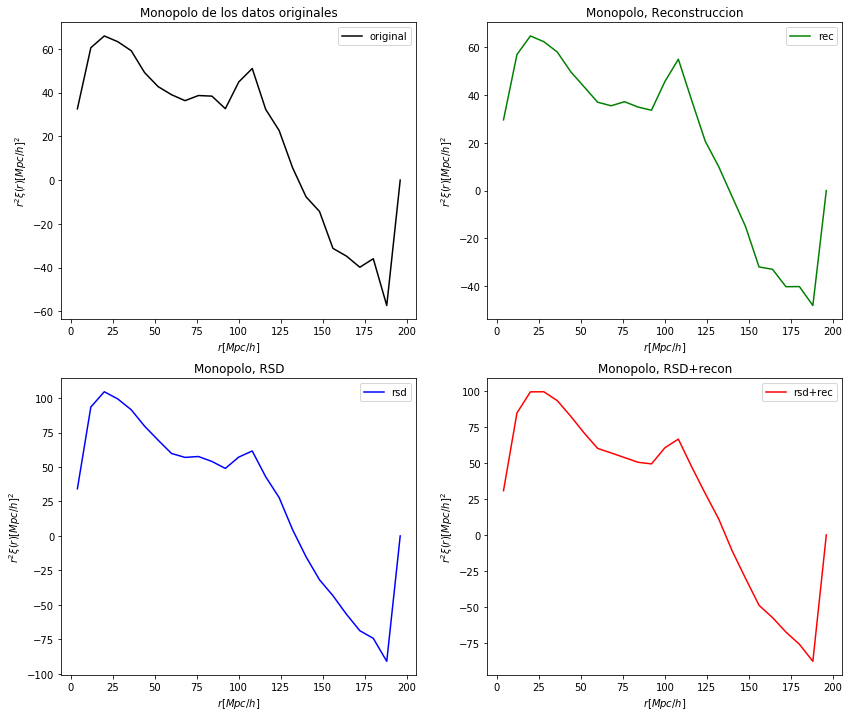

In [10]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.title("Monopolo de los datos originales")
plt.plot(r1, mono*r1**2, color='black', label='original')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,2)
plt.title("Monopolo, Reconstruccion")
plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,3)
plt.title("Monopolo, RSD")
plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,4)
plt.title("Monopolo, RSD+recon")
plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_todas.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_todas.pdf")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

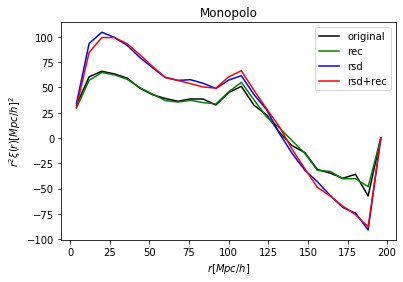

In [11]:
plt.plot(r1, mono*r1**2, color='black', label='original')
#plt.plot(r1, quad*r1**2, color='black', label='original')
plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_todas2.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_todas2.pdf")
plt.show

<function matplotlib.pyplot.show>

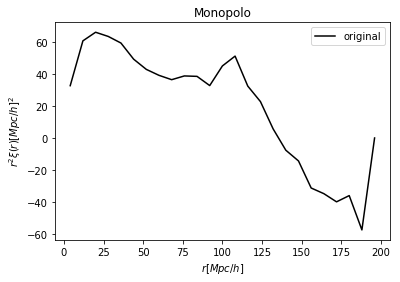

In [5]:
plt.plot(r1, mono*r1**2, color='black', label='original')
#plt.plot(r1, quad*r1**2, color='black', label='original')
#plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_original.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_original.pdf")
plt.show

<function matplotlib.pyplot.show>

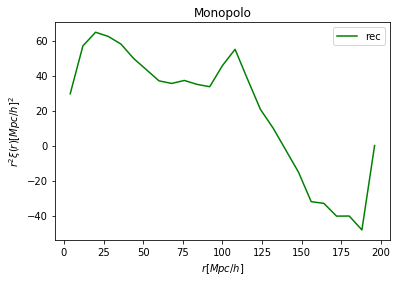

In [6]:
#plt.plot(r1, mono*r1**2, color='black', label='original')
plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rec.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rec.pdf")
plt.show

<function matplotlib.pyplot.show>

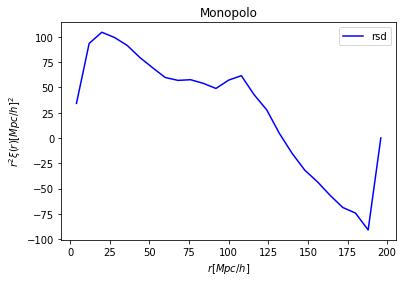

In [7]:
#plt.plot(r1, mono*r1**2, color='black', label='original')
#plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rsd.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rsd.pdf")
plt.show

<function matplotlib.pyplot.show>

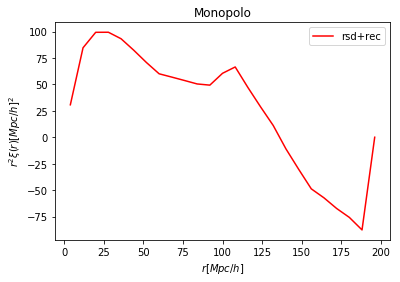

In [8]:
#plt.plot(r1, mono*r1**2, color='black', label='original')
#plt.plot(r1_rec, mono_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, mono_rsd*r1_rsd**2, color='blue', label='rsd')
plt.plot(r1_rsd_rec, mono_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Monopolo')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rsd+rec.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/monopolo_rsd+rec.pdf")
plt.show

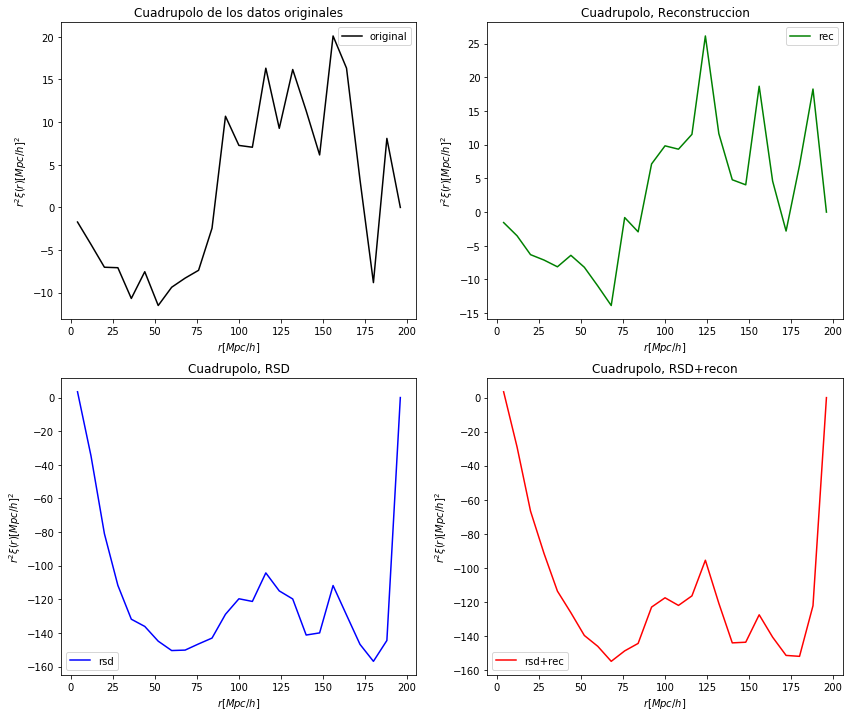

In [9]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.title("Cuadrupolo de los datos originales")
plt.plot(r1, quad*r1**2, color='black', label='original')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,2)
plt.title("Cuadrupolo, Reconstruccion")
plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,3)
plt.title("Cuadrupolo, RSD")
plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
plt.legend()
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.subplot(2,2,4)
plt.title("Cuadrupolo, RSD+recon")
plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.xlabel('$r[Mpc/h]$')
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.legend()
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_todas.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_todas.pdf")
plt.show()

<function matplotlib.pyplot.show>

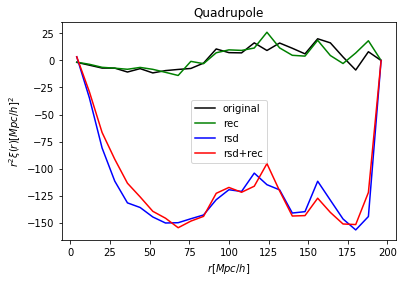

In [10]:
plt.plot(r1, quad*r1**2, color='black', label='original')
plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Quadrupole')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_todas2.png")
plt.show 

<function matplotlib.pyplot.show>

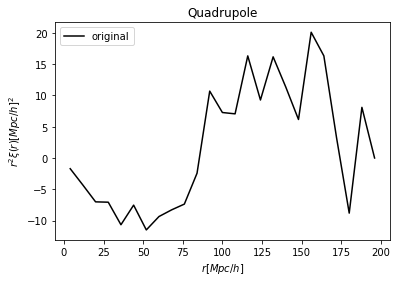

In [11]:
plt.plot(r1, quad*r1**2, color='black', label='original')
#plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Quadrupole')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_original.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_original.pdf")
plt.show 

<function matplotlib.pyplot.show>

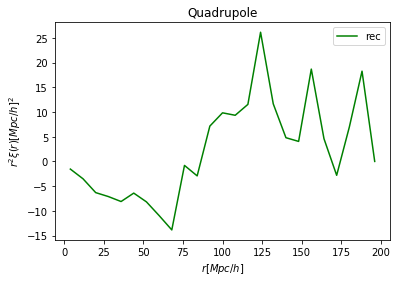

In [12]:
#plt.plot(r1, quad*r1**2, color='black', label='original')
plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Quadrupole')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rec.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rec.pdf")
plt.show 

<function matplotlib.pyplot.show>

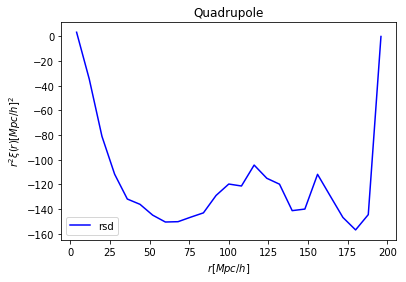

In [13]:
#plt.plot(r1, quad*r1**2, color='black', label='original')
#plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
#plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Quadrupole')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rsd.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rsd.pdf")
plt.show 

<function matplotlib.pyplot.show>

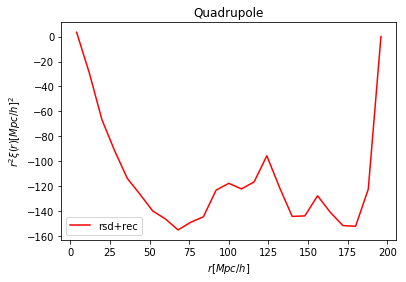

In [14]:
#plt.plot(r1, quad*r1**2, color='black', label='original')
#plt.plot(r1_rec, quad_rec*r1_rec**2, color='green', label='rec')
#plt.plot(r1_rsd, quad_rsd*r1_rsd**2, color='blue', label='rsd')
plt.plot(r1_rsd_rec, quad_rsd_rec*r1_rsd_rec**2, color='red', label='rsd+rec')
plt.title('Quadrupole')
plt.xlabel('$r[Mpc/h]$')
plt.legend()
plt.ylabel('$r^2\\xi(r)[Mpc/h]^2$')
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rsd+rec.png")
plt.savefig("/home/izamar/Downloads/plots_tesis/quadrupole_rsd+rec.pdf")
plt.show 

In [78]:
x_ran, y_ran, z_ran, w_ran = np.loadtxt('mock_1_tinker13_standard_z_0.695.ran.txt', usecols=(0, 1, 2, 3), unpack=True)

In [79]:
print np.min(x_ran), np.max(x_ran)
print np.min(x), np.max(x)

0.0003793234799598366 999.9995603239311
0.0 999.997742


In [80]:
np.savetxt('mock_1_tinker13_standard_z_0.695_2.txt',np.transpose([x,y,z,w]))

In [81]:
print x[0]
print vx[0]
print np.max(x)
print np.max(y)
print np.max(z)

16.744709
-122.694443
999.997742
999.999695
999.996704
